In [5]:
##Take quickdraw npy files and convert them into a test/train MNIST like dataset

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from os import walk, getcwd
import h5py

In [7]:
##Place all the npy quickdraw files here:
mypath = "data/doodle/"
txt_name_list = []
for (dirpath, dirnames, filenames) in walk(mypath):
    if filenames != '.DS_Store':       ##Ugh mac junk
        txt_name_list.extend(filenames)
        break

In [8]:
x_train = []
x_test = []
y_train = []
y_test = []
xtotal = []
ytotal = []
slice_train = int(80000/len(txt_name_list))  ###Setting value to be 80000 for the final dataset
i = 0
seed = np.random.randint(1, 10e6)

In [9]:
##Creates test/train split with quickdraw data
for txt_name in txt_name_list:
    txt_path = mypath + txt_name
    x = np.load(txt_path)
    x = x.astype('float32') / 255.    ##scale images
    y = [i] * len(x)  
    np.random.seed(seed)
    np.random.shuffle(x)
    np.random.seed(seed)
    np.random.shuffle(y)
    x = x[:slice_train]
    y = y[:slice_train]
    if i != 0: 
        xtotal = np.concatenate((x,xtotal), axis=0)
        ytotal = np.concatenate((y,ytotal), axis=0)
    else:
        xtotal = x
        ytotal = y
    i += 1
x_train, x_test, y_train, y_test = train_test_split(xtotal, ytotal, test_size=0.2, random_state=42)

In [10]:
##Saves this out as hdf5 format
data_to_write = x_test
with h5py.File('x_test.h5', 'w') as hf:
    hf.create_dataset("name-of-dataset",  data=data_to_write)
data_to_write = x_train
with h5py.File('x_train.h5', 'w') as hf:
    hf.create_dataset("name-of-dataset",  data=data_to_write)
data_to_write = y_test
with h5py.File('y_test.h5', 'w') as hf:
    hf.create_dataset("name-of-dataset",  data=data_to_write)
data_to_write = y_train
with h5py.File('y_train.h5', 'w') as hf:
    hf.create_dataset("name-of-dataset",  data=data_to_write)

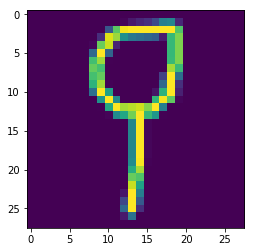

In [11]:
##Visualize a quickdraw file
import matplotlib.pyplot as plt
face1 = x_train[2].reshape(28,28)
plt.imshow(face1)
plt.show()